In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
ls Datos_Insitu/

PM2.5_1h_2000-2016.xlsx*   ~$PM2.5_1h_2000-2016.xlsx
PM25ALEX.csv               ~$PM25ALEX.xlsx
PM25ALEX.xlsx*


In [15]:
df=pd.read_csv("Datos_Insitu/PM25ALEX.csv")

In [101]:
df.head()

,date,Carvajal,Centro de Alto Rendimiento,Guaymaral,Kennedy,Las Ferias,MinAmbiente,San Cristobal,Suba,Tunal,Usaquen
0,01/01/2008 00:00,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2008 00:10,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2008 00:20,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2008 00:30,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2008 00:40,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dates=df.date.astype('str')

In [8]:
bli=[i for i,item in enumerate(dates) if "24:00" in item]
gfi=np.in1d(df.index,bli)
dfg=df[gfi]

In [9]:
dfg.head()

,date,Carvajal,Centro de Alto Rendimiento,Guaymaral,Kennedy,Las Ferias,MinAmbiente,San Cristobal,Suba,Tunal,Usaquen
144,01/01/2008 24:00,NaN,NaN,83.4,5.9,NaN,NaN,NaN,NaN,NaN,NaN
288,02/01/2008 24:00,NaN,NaN,87.8,6.6,NaN,NaN,NaN,NaN,NaN,NaN
432,03/01/2008 24:00,NaN,NaN,83.9,9.5,NaN,NaN,NaN,NaN,NaN,NaN
576,04/01/2008 24:00,NaN,NaN,15.2,6.6,NaN,NaN,NaN,NaN,NaN,NaN
720,05/01/2008 24:00,NaN,NaN,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
dfti=dfg.mean(axis=0).to_frame()

In [40]:
dfti.columns=["00:00"]

In [41]:
dfti

,00:00
Carvajal,28.657895
Centro de Alto Rendimiento,21.776115
Guaymaral,91.515500
Kennedy,29.618404
Las Ferias,13.902304
MinAmbiente,10.315436
San Cristobal,6.107965
Suba,22.129500
Tunal,15.694280
Usaquen,8.463818


In [45]:
times=[i[-5:] for i in dates[1:bli[0]] ]

In [47]:
for k in times:
    bli=[i for i,item in enumerate(dates) if k in item]
    gfi=np.in1d(df.index,bli)
    dfg=df[gfi]
    dfti[k]=dfg.mean(axis=0).to_frame()

In [54]:
dfbt=dfti.transpose()

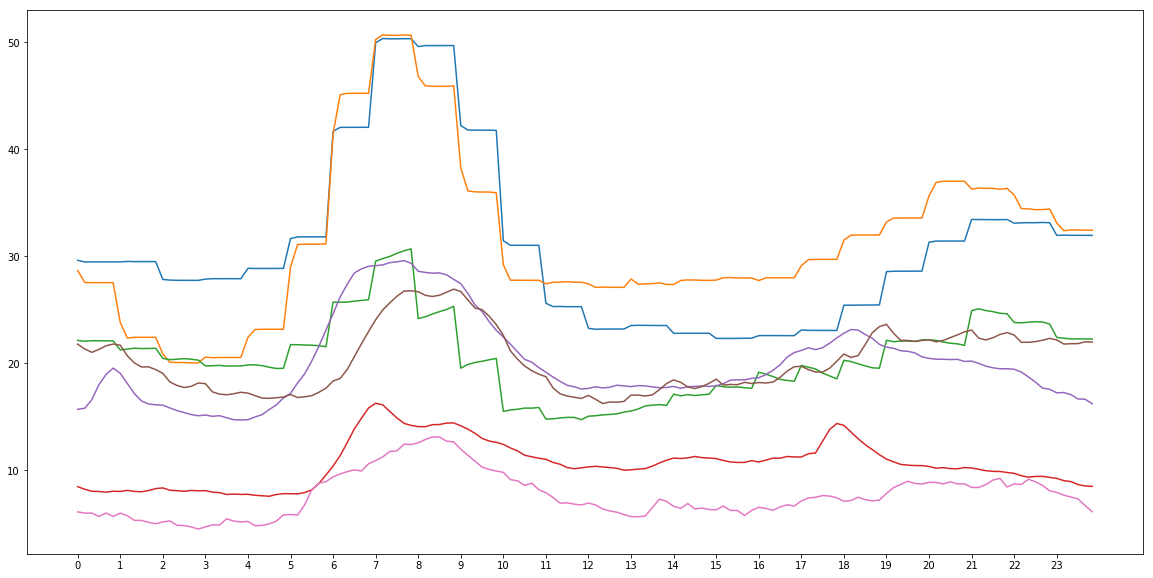

In [103]:
plt.figure(figsize=(20,10))
plt.plot(range(len(dfbt)),dfbt.Kennedy)
plt.plot(range(len(dfbt)),dfbt.Carvajal)
plt.plot(range(len(dfbt)),dfbt.Suba)
plt.plot(range(len(dfbt)),dfbt.Usaquen)
plt.plot(range(len(dfbt)),dfbt.Tunal)
plt.plot(range(len(dfbt)),dfbt['Centro de Alto Rendimiento'])
plt.plot(range(len(dfbt)),dfbt['San Cristobal'])
plt.xticks(range(0,144,6),range(24), fontsize = 10);

In [8]:
gdates=pd.to_datetime(dfg.date)

In [119]:
dfho=pd.read_csv("Datos_Insitu/PM2.5_1h_2000-2016.csv")

In [120]:
dfho.head()

,Fecha & Hora,Carvajal - Sevillana,Centro de Alto Rendimiento,Convenio_176_10,Guaymaral,Kennedy,Las Ferias,MinAmbiente,Puente Aranda,San Cristobal,Suba,Tunal,Usaquen
0,1/1/00 1:00,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,FailTech,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data
1,1/1/00 2:00,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,FailTech,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data
2,1/1/00 3:00,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,FailTech,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data
3,1/1/00 4:00,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,FailTech,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data
4,1/1/00 5:00,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data,FailTech,Sin Data,Sin Data,Sin Data,Sin Data,Sin Data


In [122]:
posnan=[]
for i in np.unique(dfho.drop('Fecha & Hora',1))[::-1]:
    try:
        float(i)
    except:
        posnan+=[i]

In [123]:
posnan

['TestValue',
 'Span',
 'Sin Data',
 'RS232',
 'InVld',
 'FailTech',
 'Calib',
 'Apagado',
 '<Muestra']

In [128]:
for ka in posnan:
    dfho=dfho.replace({ka: 'NaN'}, regex=True)

In [131]:
dfho.to_csv('cleanhrpm.csv')

In [132]:
dfch=pd.read_csv('cleanhrpm.csv')

In [135]:
dfch.head()

,Unnamed: 0,Fecha & Hora,Carvajal - Sevillana,Centro de Alto Rendimiento,Convenio_176_10,Guaymaral,Kennedy,Las Ferias,MinAmbiente,Puente Aranda,San Cristobal,Suba,Tunal,Usaquen
0,0,1/1/00 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1/1/00 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1/1/00 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1/1/00 4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1/1/00 5:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
hdates=dfch['Fecha & Hora'].astype('str')

In [137]:
hbli=[i for i,item in enumerate(hdates) if "24:00" in item]
hgfi=np.in1d(dfch.index,hbli)
dfgh=dfch[hgfi]

In [146]:
htimes=[i[-5:] for i in hdates[:23] ]

In [148]:
dfth=dfgh.mean(axis=0).to_frame()

In [149]:
dfth.columns=["00:00"]

In [150]:
dfth

,00:00
Unnamed: 0,72467.157808
Carvajal - Sevillana,34.316937
Centro de Alto Rendimiento,21.685269
Convenio_176_10,22.323355
Guaymaral,37.423395
Kennedy,31.300750
Las Ferias,15.099559
MinAmbiente,13.317828
Puente Aranda,NaN
San Cristobal,9.050478


In [151]:
for k in htimes:
    hbli=[i for i,item in enumerate(hdates) if k in item]
    hgfi=np.in1d(dfch.index,hbli)
    dfgh=dfch[hgfi]
    dfth[k]=dfgh.mean(axis=0).to_frame()

In [152]:
dfbh=dfth.transpose()

In [156]:
dfbh=dfbh.drop('Unnamed: 0',1)

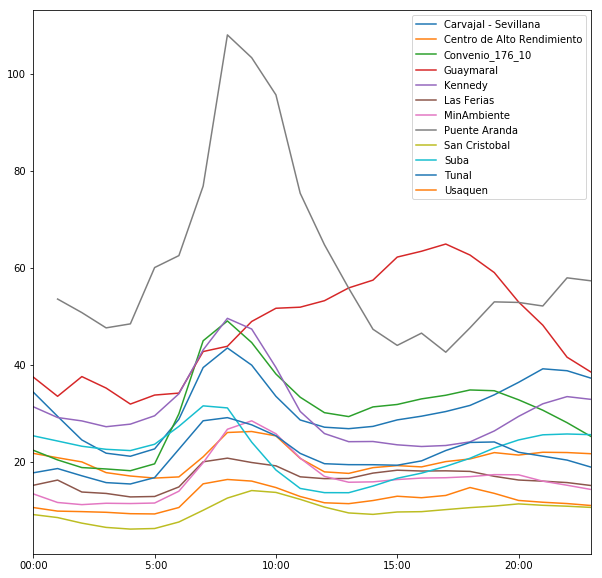

In [166]:
dfbh.plot(figsize=(10,10))

In [164]:
dfbh.plot?